In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
s = "ababbc"

class Solution:
    def longestSubstring(self, s: str, k: int) -> (int, str):
        if len(s) < k:
            return 0, ""
        c = min(set(s), key=s.count)
        if s.count(c) >= k:
            return len(s), s
        # Find the substring with maximum length that satisfies the condition
        max_length = 0
        max_string = ""
        for t in s.split(c):
            current_length, current_string = self.longestSubstring(t, k)
            if current_length > max_length:
                max_length = current_length
                max_string = current_string
        return max_length, max_string

# Test the function
solution = Solution()
solution.longestSubstring(s, 2)


(5, 'ababb')

In [12]:
langs = ["bengali", "hindi", "kannada", "gujarati", "malayalam", "tamil", "telugu"]

/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fi

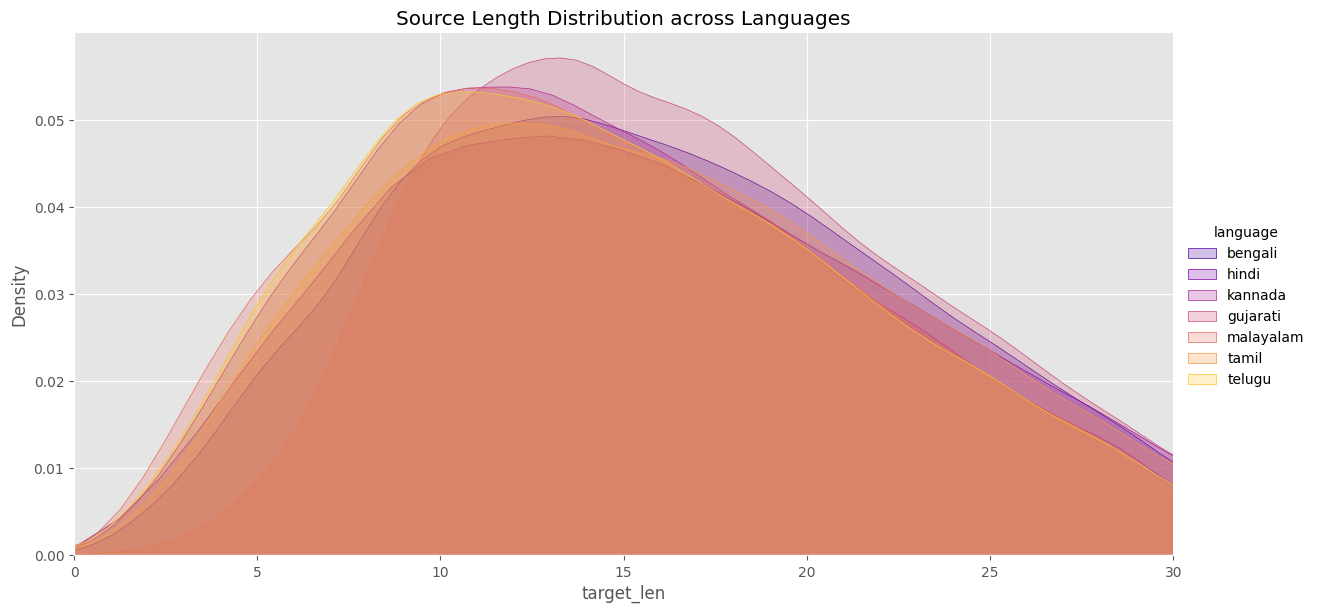

In [44]:
counts = []
src_mean = []
target_mean= []
df_list = []

for l in langs:
    # Reading the cleaned data
    data = pd.read_csv("models/{}.csv".format(l))
    data.dropna(subset=['source', 'target'], inplace=True)
    data['source'] = data['source'].astype(str)
    data['target'] = data['target'].astype(str)
    counts.append(data.shape[0])
    data["source_len"] = data["source"].apply(lambda x : len(x.split(" ")))
    data["target_len"] = data["target"].apply(lambda x : len(x.split(" ")))
    data['language'] = l  # add a column to denote the language
    df_list.append(data[['target_len', 'language']])

# Concatenate all dataframes in df_list
all_data = pd.concat(df_list, ignore_index=True)

# Create a facet grid and map the distribution to it
g = sns.FacetGrid(all_data, hue="language", height=6, aspect=2, palette="plasma")
g.map(sns.kdeplot, "target_len", shade=True)

# Set the xlim
g.set(xlim=(0, 30))  # Adjust this range as needed

# Set other plot details
g.add_legend()
plt.title("Source Length Distribution across Languages")
plt.savefig("target_kde.png")
plt.show()

/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/rajarshi/autogpt/SemEval/str/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fi

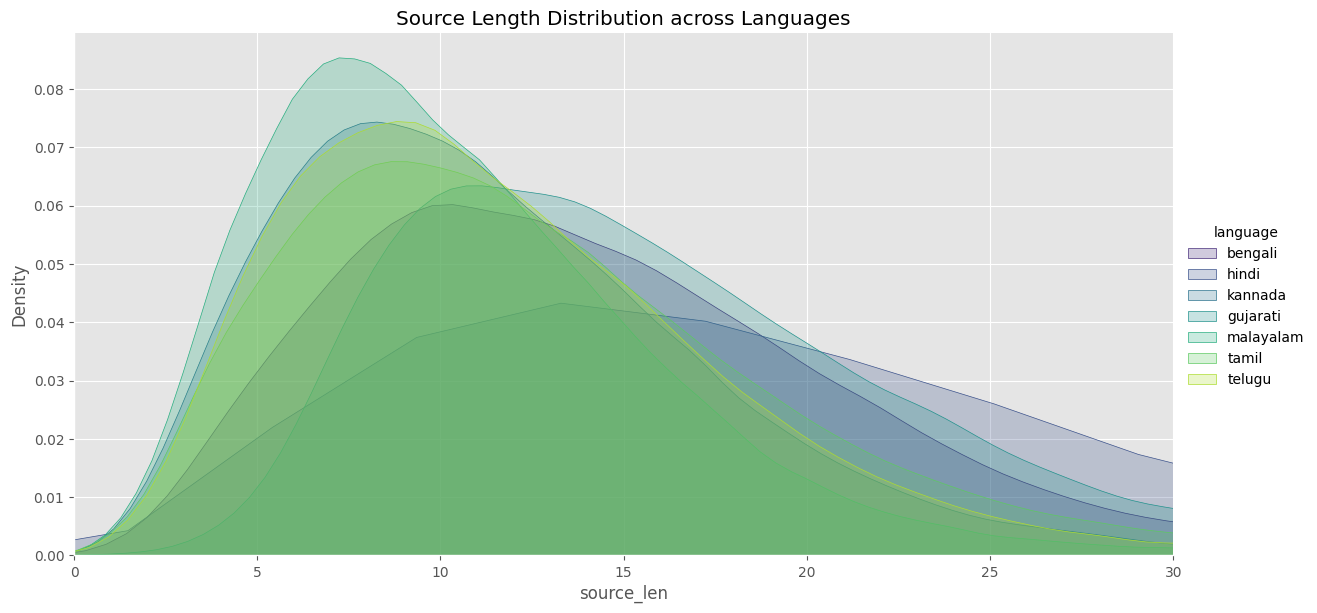

In [41]:
counts = []
src_mean = []
target_mean= []
df_list = []

for l in langs:
    # Reading the cleaned data
    data = pd.read_csv("models/{}.csv".format(l))
    data.dropna(subset=['source', 'target'], inplace=True)
    data['source'] = data['source'].astype(str)
    data['target'] = data['target'].astype(str)
    counts.append(data.shape[0])
    data["source_len"] = data["source"].apply(lambda x : len(x.split(" ")))
    data["target_len"] = data["target"].apply(lambda x : len(x.split(" ")))
    data['language'] = l  # add a column to denote the language
    df_list.append(data[['source_len', 'language']])

# Concatenate all dataframes in df_list
all_data = pd.concat(df_list, ignore_index=True)

# Create a facet grid and map the distribution to it
g = sns.FacetGrid(all_data, hue="language", height=6, aspect=2, palette="viridis")
g.map(sns.kdeplot, "source_len", shade=True)

# Set the xlim
g.set(xlim=(0, 30))  # Adjust this range as needed

# Set other plot details
g.add_legend()
plt.title("Source Length Distribution across Languages")
plt.savefig("src_kde.png")
plt.show()

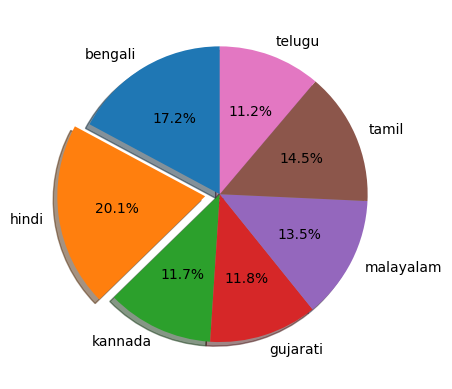

In [19]:
explode = (0, 0.1, 0, 0, 0, 0, 0)
sizes = counts
# creating a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=langs, autopct='%1.1f%%', shadow=True, startangle=90)
fig.savefig("nums_langs.png")
plt.show()

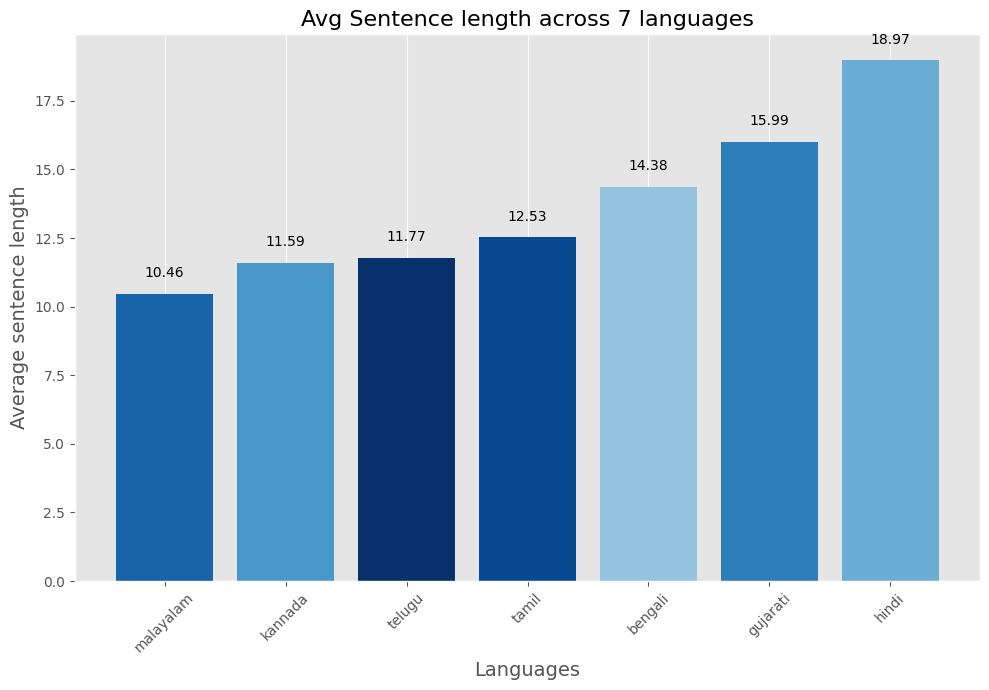

In [25]:
# Using ggplot style for aesthetic appeal
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
cmap = plt.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.4, 1, len(langs))]
sorted_indices = np.argsort(src_mean)
langs_sorted = np.array(langs)[sorted_indices]
src_mean_sorted = np.array(src_mean)[sorted_indices]
colors_sorted = np.array(colors)[sorted_indices]
bars = plt.bar(langs_sorted, src_mean_sorted, color=colors_sorted)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Average sentence length", fontsize=14)
plt.title("Avg Sentence length across 7 languages", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("source_lens.png")
# Display the plot
plt.show()

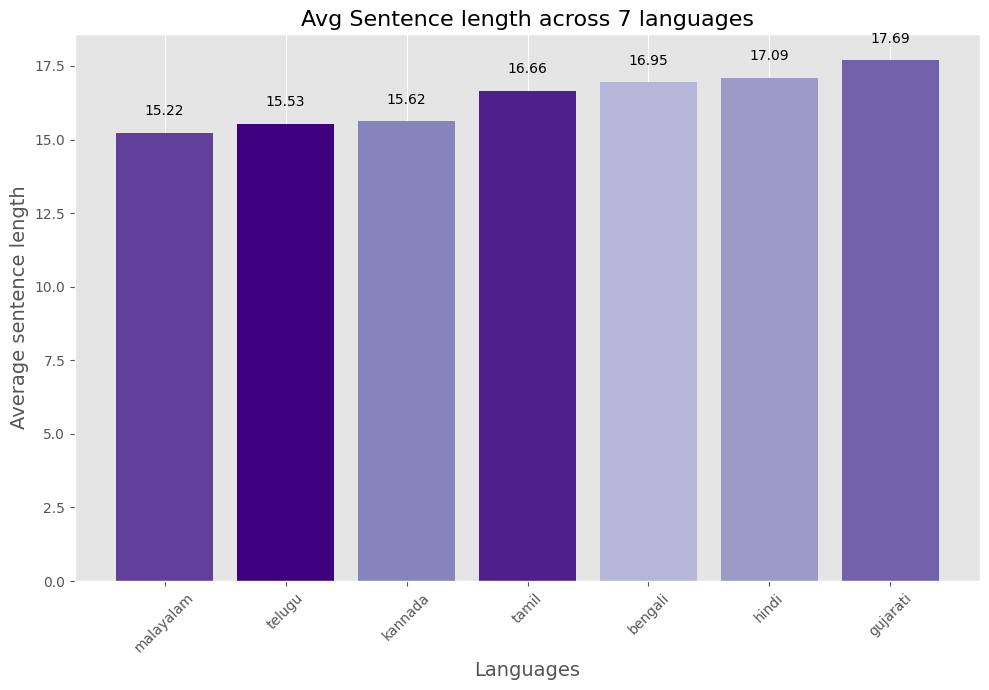

In [27]:
# Using ggplot style for aesthetic appeal
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
cmap = plt.get_cmap('Purples')
colors = [cmap(i) for i in np.linspace(0.4, 1, len(langs))]
sorted_indices = np.argsort(target_mean)
langs_sorted = np.array(langs)[sorted_indices]
target_mean_sorted = np.array(target_mean)[sorted_indices]
colors_sorted = np.array(colors)[sorted_indices]
bars = plt.bar(langs_sorted, target_mean_sorted, color=colors_sorted)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Average sentence length", fontsize=14)
plt.title("Avg Sentence length across 7 languages", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("target_lens.png")
# Display the plot
plt.show()

In [ ]:
for l in langs:
    data = pd.read_csv("models/{}.csv".format(l))
    data.dropna(subset=['source', 'target'], inplace=True)
    data["source_len"].

[16.946723216360677,
 17.09001683251646,
 15.61869043039706,
 17.689271724021733,
 15.217496670119875,
 16.664210688644815,
 15.534317655442722]